In [1]:
# https://medium.com/@akashprabhakar427/solar-power-forecasting-using-machine-learning-and-deep-learning-61d6292693de

In [2]:
##Importing all necessary packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import zipfile

# Plant Generation Data
df_gen = pd.read_csv('Plant_2_Generation_Data.csv')

# Plant Weather Data
df_weather = pd.read_csv('Plant_2_Weather_Sensor_Data.csv') 

In [3]:
print('Plant ID ',df_gen.PLANT_ID.nunique())
print('No. of Inverters ',df_gen.SOURCE_KEY.nunique())
print('No. of Unique Source key',df_weather.SOURCE_KEY.nunique())
print('Null values in generation data: \n',df_gen.isnull().sum())
print('Null values in generation data: \n',df_weather.isnull().sum()) 

Plant ID  1
No. of Inverters  22
No. of Unique Source key 1
Null values in generation data: 
 DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64
Null values in generation data: 
 DATE_TIME              0
PLANT_ID               0
SOURCE_KEY             0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64


In [4]:

#Dropping PLANT_ID 
df_gen.drop('PLANT_ID', axis=1, inplace=True)
df_weather.drop('PLANT_ID', axis = 1, inplace=True)

## Mapping
Inverter_labels = {inverter_no:inverter_name for inverter_name,inverter_no in enumerate(df_gen['SOURCE_KEY'].unique(),1)}
df_gen['Inverter_No'] = df_gen['SOURCE_KEY'].map(Inverter_labels) 

## Drop Source Key after replacing with inverter numbers
df_gen.drop('SOURCE_KEY',axis=1,inplace=True)
df_weather.drop('SOURCE_KEY',axis=1,inplace=True) 
#Reordering and dropping Daily yield and Total yield
df_gen = df_gen[['DATE_TIME','Inverter_No' ,'DC_POWER', 'AC_POWER']]

In [5]:
print('Inverter {} has data for {} timestamps(Minimum)'.
      format(df_gen.groupby('Inverter_No')['DATE_TIME'].count().argmin()+1,df_gen.groupby('Inverter_No')['DATE_TIME'].count().min()))
print('Inverter {} has data for {} timestamps(Maximum)'.
      format(df_gen.groupby('Inverter_No')['DATE_TIME'].count().argmax()+1,df_gen.groupby('Inverter_No')['DATE_TIME'].count().max()))     
print('DIFFERENCE = {}'.format(df_gen.groupby('Inverter_No')['DATE_TIME'].count().max() - 
                               df_gen.groupby('Inverter_No')['DATE_TIME'].count().min()))

Inverter 5 has data for 2355 timestamps(Minimum)
Inverter 2 has data for 3259 timestamps(Maximum)
DIFFERENCE = 904


In [6]:
from functools import reduce

grouped = df_gen.groupby('Inverter_No')

## Making a list of each Inverter group 
dfs = list()
for i in df_gen['Inverter_No'].unique():
    dfs.append(grouped.get_group(i))
  

 ## Merging data inverterwise using 'reduce'
 ## Applying merge function to all of the list elements of 'dfs' in the sequence passed.

df_new = reduce(lambda left,right: pd.merge(left,right,on=['DATE_TIME'],how='outer'),dfs)

display(df_new)
#Rename columns
df_new.columns = ['DATE_TIME',
        'DC_POWER_1', 'AC_POWER_1',
        'Inverter_No_1', 'DC_POWER_2', 'AC_POWER_2',
        'Inverter_No_2', 'DC_POWER_3', 'AC_POWER_3',
        'Inverter_No_3', 'DC_POWER_4', 'AC_POWER_4',
        'Inverter_No_4', 'DC_POWER_5', 'AC_POWER_5',
        'Inverter_No_5', 'DC_POWER_6', 'AC_POWER_6',
        'Inverter_No_6', 'DC_POWER_7', 'AC_POWER_7',
        'Inverter_No_7', 'DC_POWER_8', 'AC_POWER_8',
        'Inverter_No_8', 'DC_POWER_9', 'AC_POWER_9',
        'Inverter_No_9', 'DC_POWER_10', 'AC_POWER_10',
        'Inverter_No_10', 'DC_POWER_11', 'AC_POWER_11',
        'Inverter_No_11', 'DC_POWER_12', 'AC_POWER_12',
        'Inverter_No_12', 'DC_POWER_13', 'AC_POWER_13',
        'Inverter_No_13', 'DC_POWER_14', 'AC_POWER_14',
        'Inverter_No_14', 'DC_POWER_15', 'AC_POWER_15',
        'Inverter_No_15', 'DC_POWER_16', 'AC_POWER_16',
        'Inverter_No_16', 'DC_POWER_17', 'AC_POWER_17',
        'Inverter_No_17', 'DC_POWER_18', 'AC_POWER_18',
        'Inverter_No_18', 'DC_POWER_19', 'AC_POWER_19',
        'Inverter_No_19', 'DC_POWER_20', 'AC_POWER_20',
        'Inverter_No_20', 'DC_POWER_21', 'AC_POWER_21',
        'Inverter_No_21', 'DC_POWER_22', 'AC_POWER_22',
        'Inverter_No_22']

C:\Users\quean\AppData\Local\Temp\ipykernel_1056\2521044000.py:14: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Inverter_No_x', 'DC_POWER_x', 'AC_POWER_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_new = reduce(lambda left,right: pd.merge(left,right,on=['DATE_TIME'],how='outer'),dfs)
C:\Users\quean\AppData\Local\Temp\ipykernel_1056\2521044000.py:14: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Inverter_No_x', 'DC_POWER_x', 'AC_POWER_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_new = reduce(lambda left,right: pd.merge(left,right,on=['DATE_TIME'],how='outer'),dfs)
C:\Users\quean\AppData\Local\Temp\ipykernel_1056\2521044000.py:14: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Inverter_No_x', 'DC_POWER_x', 'AC_POWER_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_new = reduce(lambda left,right: pd.merge(left,rig

,DATE_TIME,Inverter_No_x,DC_POWER_x,AC_POWER_x,Inverter_No_y,DC_POWER_y,AC_POWER_y,Inverter_No_x,DC_POWER_x,AC_POWER_x,...,AC_POWER_x,Inverter_No_y,DC_POWER_y,AC_POWER_y,Inverter_No_x,DC_POWER_x,AC_POWER_x,Inverter_No_y,DC_POWER_y,AC_POWER_y
0,2020-05-15 00:00:00,1.0,0.0,0.0,2,0.0,0.0,3,0.0,0.0,...,0.000000,20,0.000000,0.000000,21.0,0.0,0.0,22,0.0,0.0
1,2020-05-15 00:15:00,1.0,0.0,0.0,2,0.0,0.0,3,0.0,0.0,...,0.000000,20,0.000000,0.000000,21.0,0.0,0.0,22,0.0,0.0
2,2020-05-15 00:30:00,1.0,0.0,0.0,2,0.0,0.0,3,0.0,0.0,...,0.000000,20,0.000000,0.000000,21.0,0.0,0.0,22,0.0,0.0
3,2020-05-15 00:45:00,1.0,0.0,0.0,2,0.0,0.0,3,0.0,0.0,...,0.000000,20,0.000000,0.000000,21.0,0.0,0.0,22,0.0,0.0
4,2020-05-15 01:00:00,1.0,0.0,0.0,2,0.0,0.0,3,0.0,0.0,...,0.000000,20,0.000000,0.000000,21.0,0.0,0.0,22,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3254,2020-05-20 13:00:00,NaN,NaN,NaN,2,0.0,0.0,3,0.0,0.0,...,1179.653333,20,1299.906667,1267.406667,NaN,NaN,NaN,22,0.0,0.0
3255,2020-05-20 13:15:00,NaN,NaN,NaN,2,0.0,0.0,3,0.0,0.0,...,1173.713333,20,1286.700000,1254.526667,NaN,NaN,NaN,22,0.0,0.0
3256,2020-05-20 13:30:00,NaN,NaN,NaN,2,0.0,0.0,3,0.0,0.0,...,1116.450000,20,1224.671429,1194.050000,NaN,NaN,NaN,22,0.0,0.0
3257,2020-05-20 13:45:00,NaN,NaN,NaN,2,0.0,0.0,3,0.0,0.0,...,1095.706667,20,1200.953333,1170.946667,NaN,NaN,NaN,22,0.0,0.0


In [7]:
df_weather['DATE_TIME'] = df_weather['DATE_TIME'].astype(str)
df_new['DATE_TIME'] = df_new['DATE_TIME'].astype(str)
#Merging Generation & Weather datasets
df = df_weather.merge(df_new,left_on='DATE_TIME',right_on='DATE_TIME',how='outer')
#Generating 15 min time blocks
tb = pd.date_range('15-05-2020','16-05-2020',freq='15min')
tb=tb[:-1] 
ts = tb.strftime('%H:%M')
block_dict = {}
j=1
for i in range(len(ts)):
    block_dict[ts[i]] =  j
    j+=1

# Making new columns of Time,BLOCK and Date and droping DATE_TIME column
df['TIME'] = df['DATE_TIME'].apply(lambda x:str(x)[-8:-3])
df['DATE'] = pd.to_datetime(df['DATE_TIME']).dt.date
df['BLOCK'] = pd.to_datetime(df['TIME']).astype(str).apply(lambda x:block_dict[str(x)[-8:-3]])
df.drop('DATE_TIME',axis=1,inplace=True)
#Saving the dictionary using numpy
np.save('timestamp_block_dictionary.npy',block_dict)

## Column re-ordering
cols = df.columns.tolist()
df = df[[cols[-1]]+[cols[-2]]+[cols[-3]]+cols[:-3]]

display(df)

C:\Users\quean\AppData\Local\Temp\ipykernel_1056\3849973740.py:6: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  tb = pd.date_range('15-05-2020','16-05-2020',freq='15min')


,BLOCK,DATE,TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER_1,AC_POWER_1,Inverter_No_1,DC_POWER_2,...,Inverter_No_19,DC_POWER_20,AC_POWER_20,Inverter_No_20,DC_POWER_21,AC_POWER_21,Inverter_No_21,DC_POWER_22,AC_POWER_22,Inverter_No_22
0,1,2020-05-15,00:00,27.004764,25.060789,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
1,2,2020-05-15,00:15,26.880811,24.421869,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
2,3,2020-05-15,00:30,26.682055,24.427290,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
3,4,2020-05-15,00:45,26.500589,24.420678,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
4,5,2020-05-15,01:00,26.596148,25.088210,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3254,92,2020-06-17,22:45,23.511703,22.856201,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
3255,93,2020-06-17,23:00,23.482282,22.744190,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
3256,94,2020-06-17,23:15,23.354743,22.492245,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0
3257,95,2020-06-17,23:30,23.291048,22.373909,0.0,1.0,0.0,0.0,2,...,0.0,20,0.0,0.0,21.0,0.0,0.0,22,0.0,0.0


In [8]:
#Getting last 3 days data 
last_3_days = df['DATE'].astype(str).unique()[-3:]
df_test = df[df['DATE'].astype(str).isin(last_3_days)].sort_values(by=['DATE','BLOCK'])
#Saving Test data
df_test.reset_index(drop=True).to_csv('Test_data.csv')
#Saving all as Train for indexes not present in test data
df_train = df[~df.index.isin(df_test.index)]
df_train.to_csv('Train_data.csv')

## Checking shapes
print('Train:',df_train.shape)
print('Test:',df_test.shape)

## Check for missing values
print('No. of missing values in train dataset: ',list(df_train.isnull().sum()))

Train: (2971, 72)
Test: (288, 72)
No. of missing values in train dataset:  [0, 0, 0, 0, 0, 0, 64, 64, 64, 0, 0, 0, 0, 0, 0, 64, 64, 64, 904, 904, 904, 0, 0, 0, 0, 0, 0, 64, 64, 64, 904, 904, 904, 0, 0, 0, 64, 64, 64, 64, 64, 64, 0, 0, 0, 0, 0, 0, 904, 904, 904, 64, 64, 64, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 904, 904, 904, 0, 0, 0]


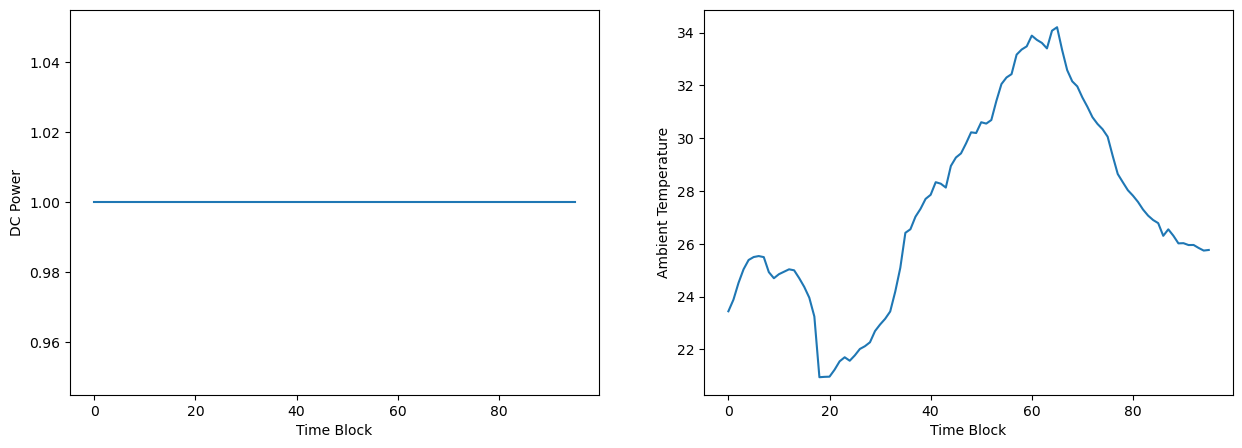

In [9]:
f = plt.figure(figsize=(15,5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax1.plot(df_train[df_train['DATE'].astype(str)=='2020-05-18'].reset_index(drop=True)['DC_POWER_1'])
ax2.plot(df_train[df_train['DATE'].astype(str)=='2020-05-18'].reset_index(drop=True)['AMBIENT_TEMPERATURE'])
ax1.set_xlabel('Time Block')
ax1.set_ylabel('DC Power')

ax2.set_xlabel('Time Block')
ax2.set_ylabel('Ambient Temperature')

plt.show()

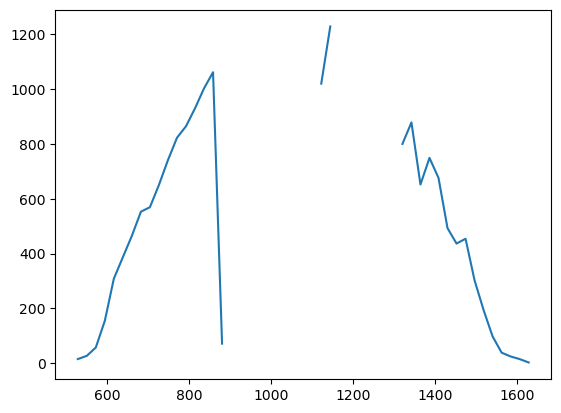

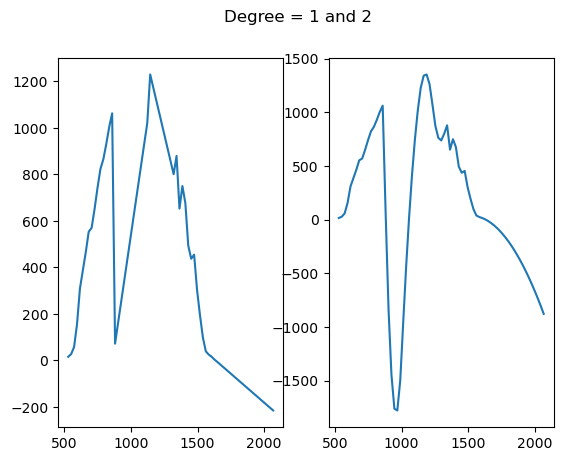

In [10]:

#Code for Plot 1
df2 = df_gen.copy() # Making a acopy 
df2['DATE'] = pd.to_datetime(df_gen['DATE_TIME']).dt.date.astype(str)
## Selecting a date and replacing AC Power with NaN wherever its 0 and plotting 
indexes = df2[(df2['Inverter_No']==1)&(df2['DATE']=='2020-05-15')&(df2['AC_POWER']==0)].index
df2.loc[indexes,'AC_POWER']=np.nan
df2 = df2[(df2['Inverter_No']==1)&(df2['DATE']=='2020-05-15')]['AC_POWER']
df2.plot();

#Code for Plot 2
## Comparison between 1 & 2 degree splines
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Degree = 1 and 2')
ax1.plot(df2.interpolate(method='spline',order=1))
ax2.plot(df2.interpolate(method='spline',order=2));

In [11]:
day_only_columns=list()
#Will collect all names like DC_POWER_1, DC_POWER_2 and so on 
DC_cols = [i for i in df.columns if 'DC_POWER' in i]
AC_cols = [i for i in df.columns if 'AC_POWER' in i]
day_only_columns = DC_cols+AC_cols+["IRRADIATION"]

def Data_Preparation_Plant_Level(df):
    for col in day_only_columns:
        df[col] = df[col].astype(float)
        # For time except for non-generating hours(12 am to 6 am & 6 pm to 12 am) will be replaced by zero
        df.loc[df[(~((df['BLOCK']>24) & (df['BLOCK']<73))) & df[col].isnull()].index,col] = 0

    # Left NaN value for generating hours(6 am to 6pm) 
       
        #1.AC & DC columns
    df[DC_cols+AC_cols].interpolate(method='polynomial',order = 2,inplace=True)
       #2.Left NaN values in Irradiation, Ambient Temp, Module Temp, Inverter_No
    df.interpolate(method='linear',inplace=True)
    
    # Summing up Inverter wise AC and DC values to reach Plant-level generation
    df['AC_POWER'] = df.loc[: ,AC_cols].sum(axis=1)
    df['DC_POWER'] = df.loc[:,DC_cols].sum(axis=1)
    #Scaling generation to MW from kW  
    df['AC_POWER'] = df['AC_POWER']/1000
    df['DC_POWER'] = df['DC_POWER']/1000
    
    return df
#Applying the function on Train & Test 
df_train = Data_Preparation_Plant_Level(df_train)
df_test = Data_Preparation_Plant_Level(df_test)

C:\Users\quean\AppData\Local\Temp\ipykernel_1056\101290986.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(float)
C:\Users\quean\AppData\Local\Temp\ipykernel_1056\101290986.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[DC_cols+AC_cols].interpolate(method='polynomial',order = 2,inplace=True)
C:\Users\quean\AppData\Local\Temp\ipykernel_1056\101290986.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

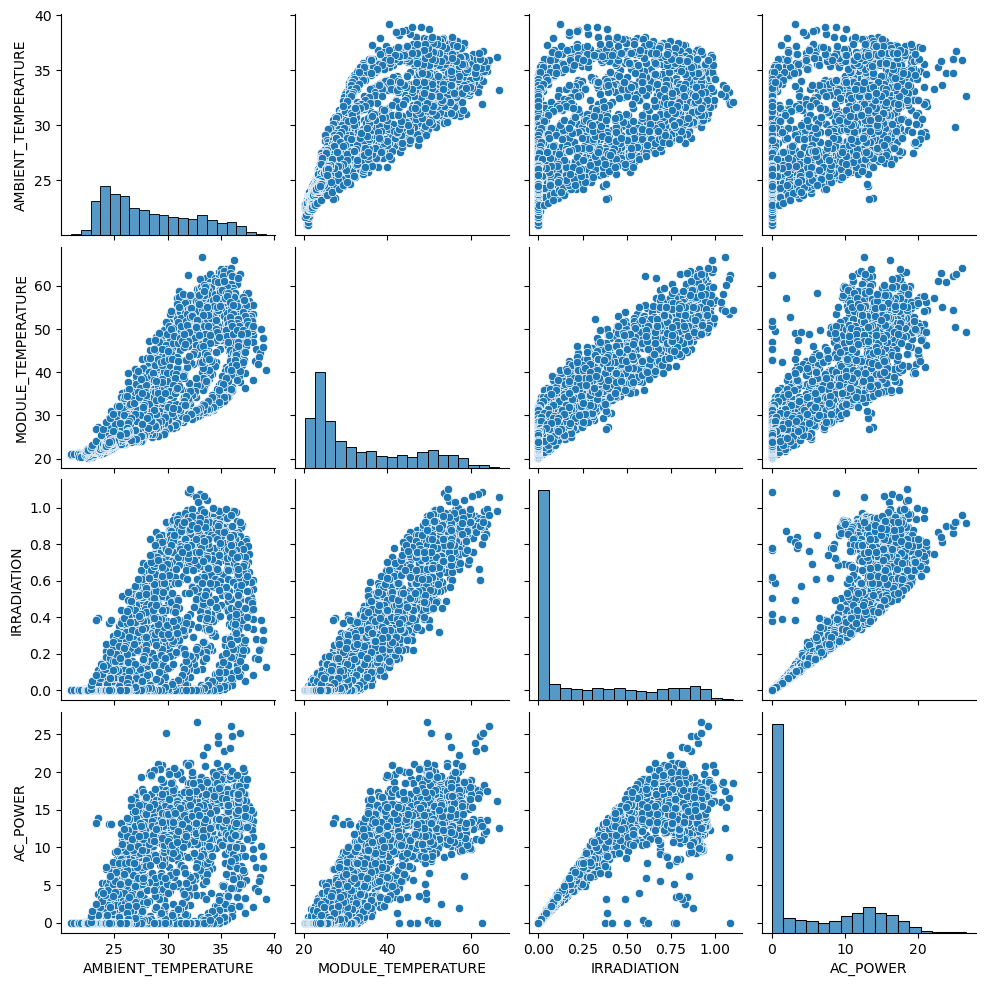

In [12]:
import seaborn as sns
sns.pairplot(df_train[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE',
       'IRRADIATION','AC_POWER']],height=2.5)

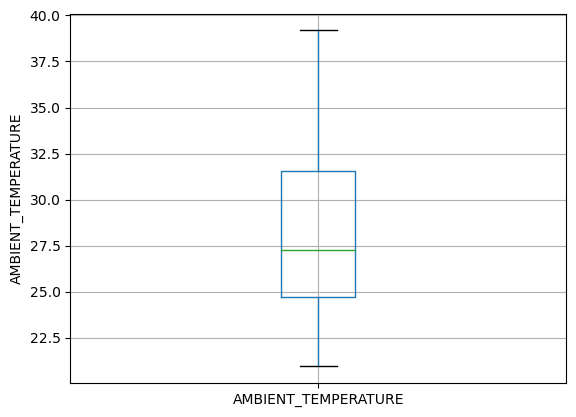

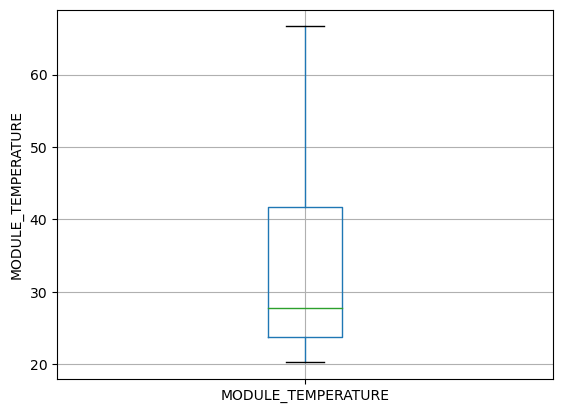

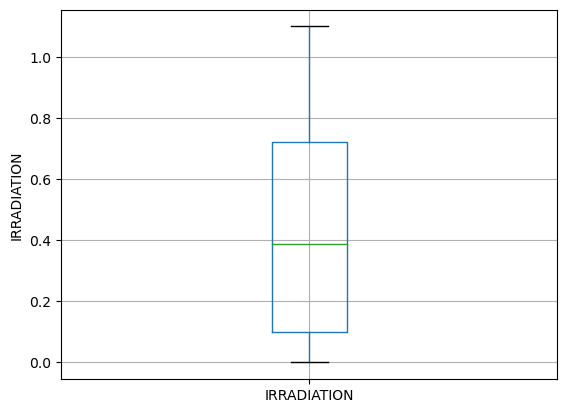

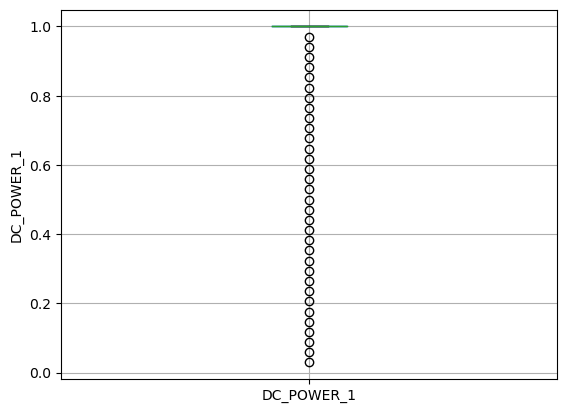

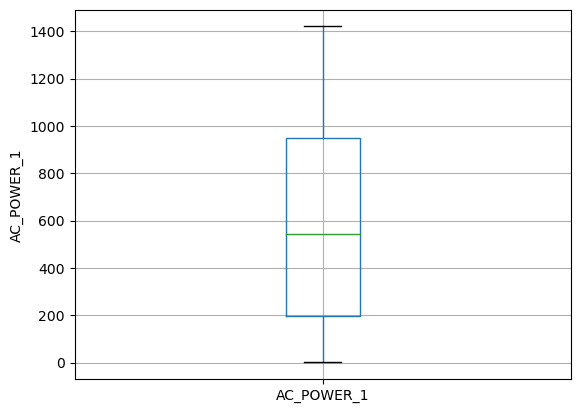

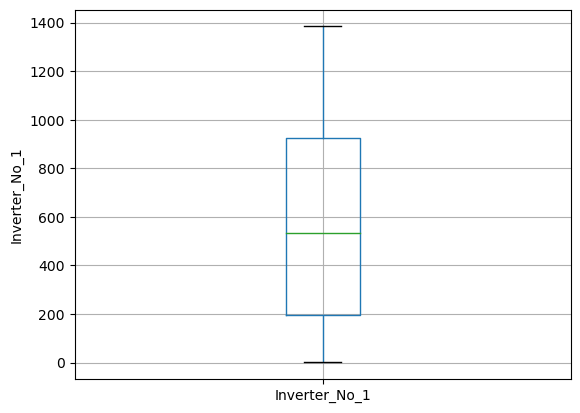

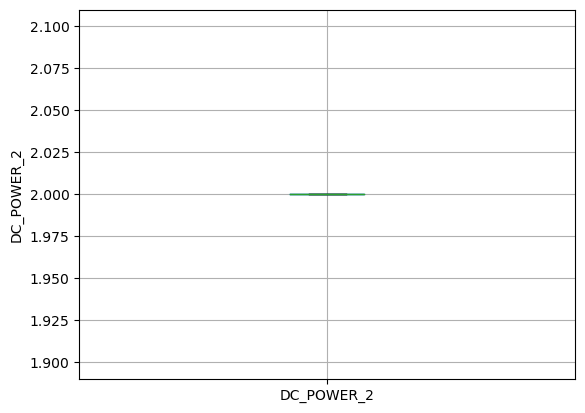

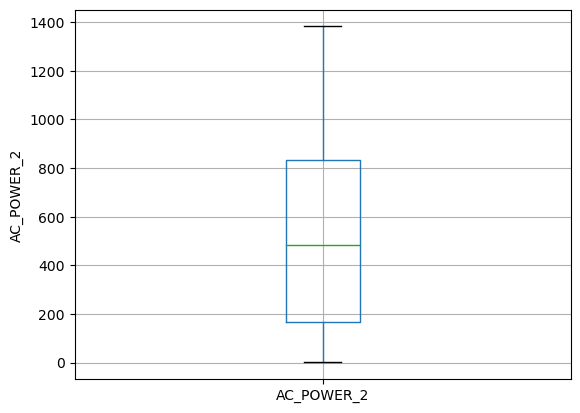

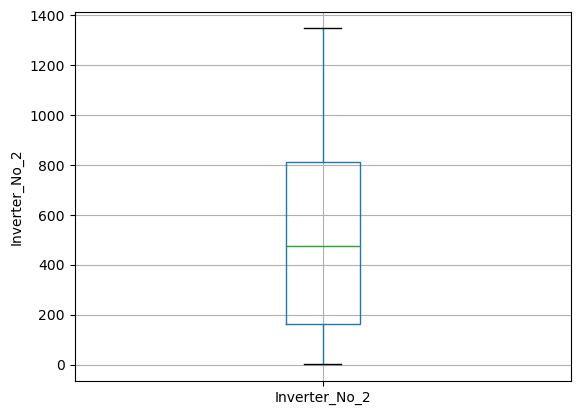

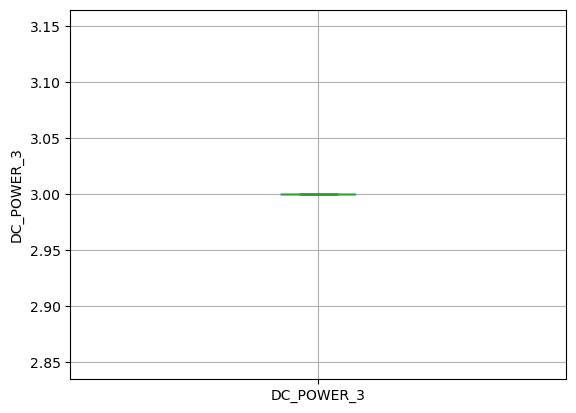

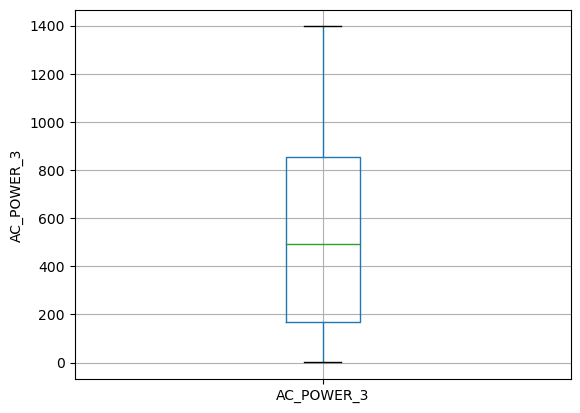

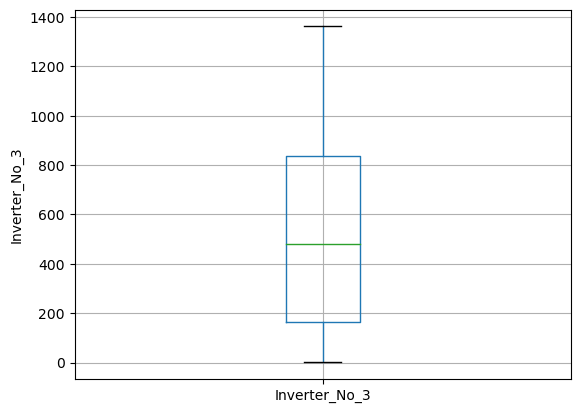

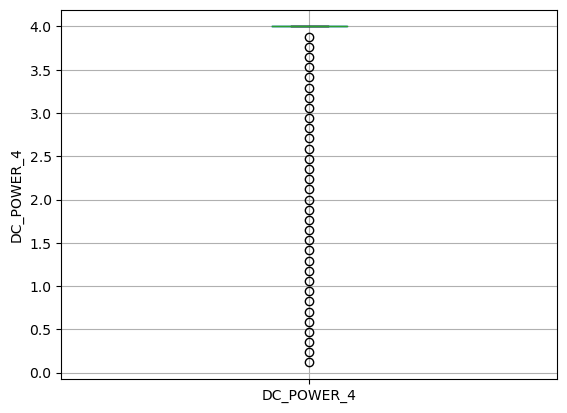

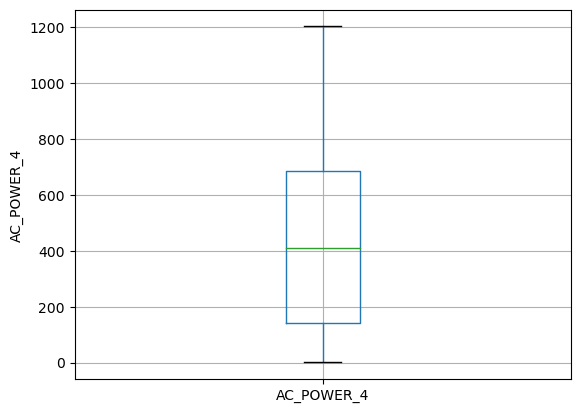

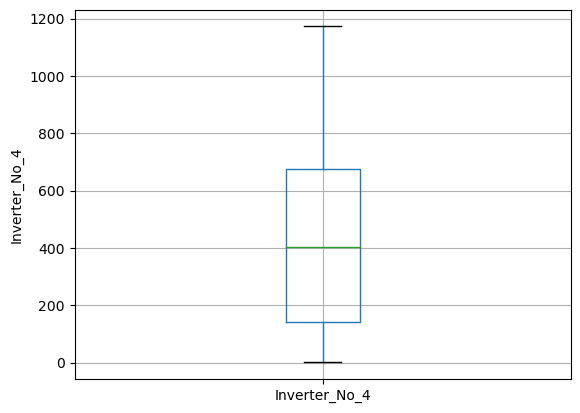

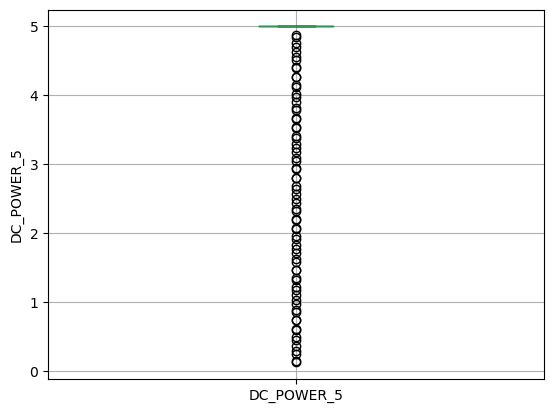

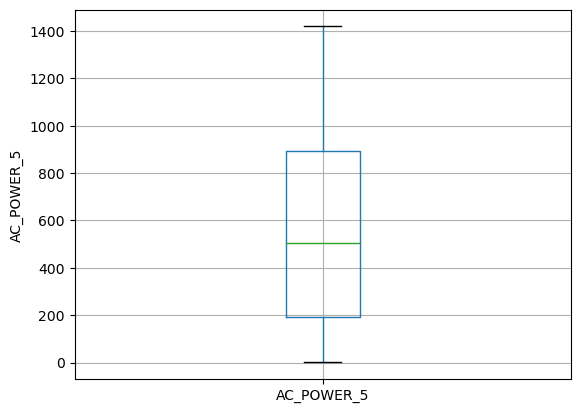

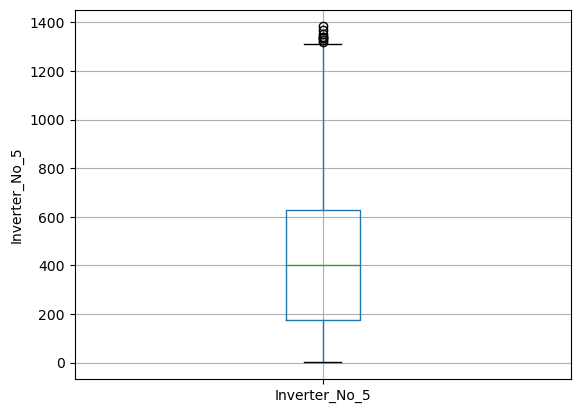

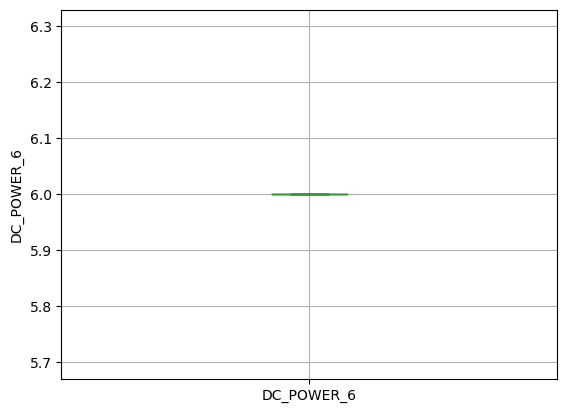

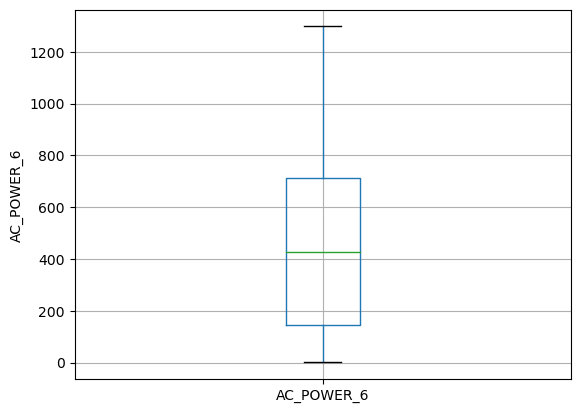

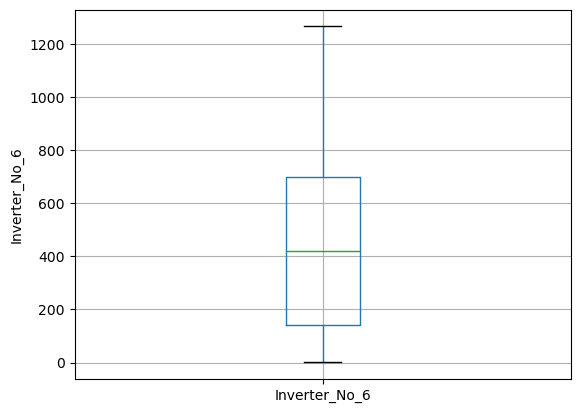

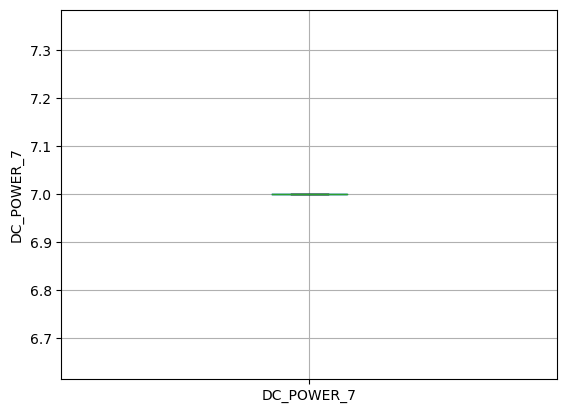

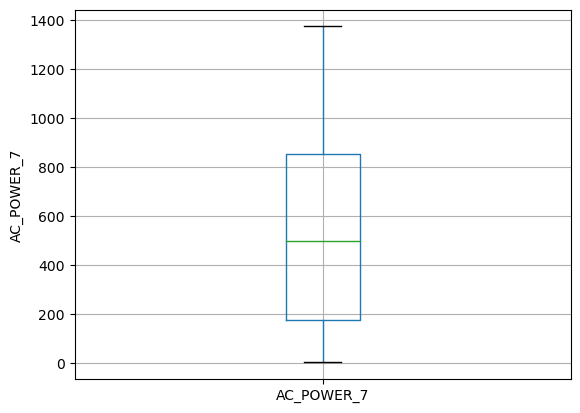

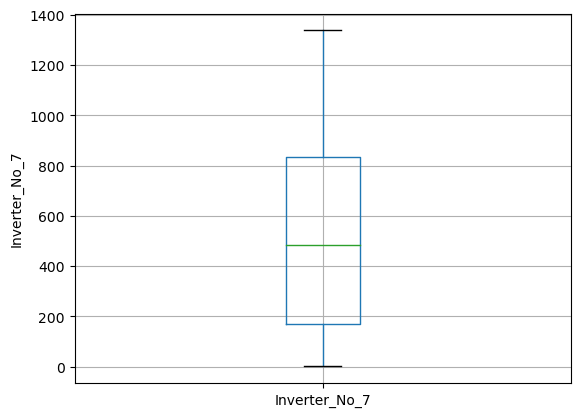

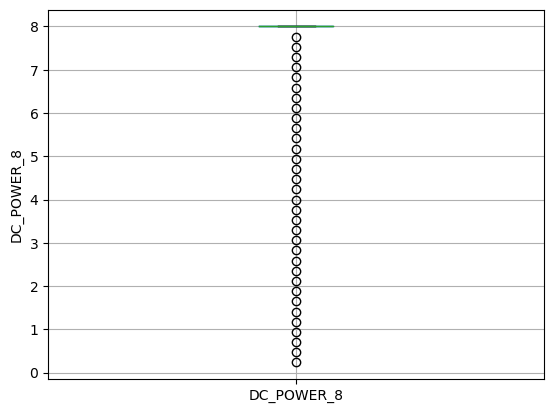

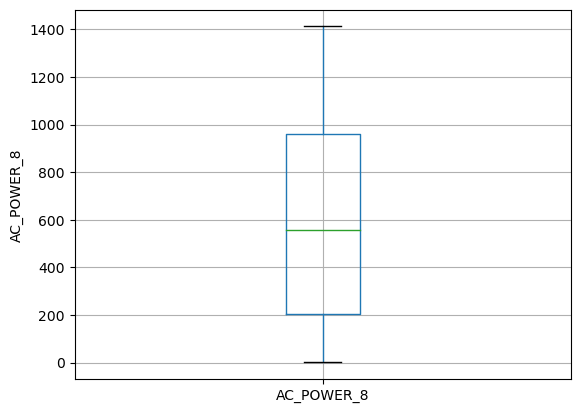

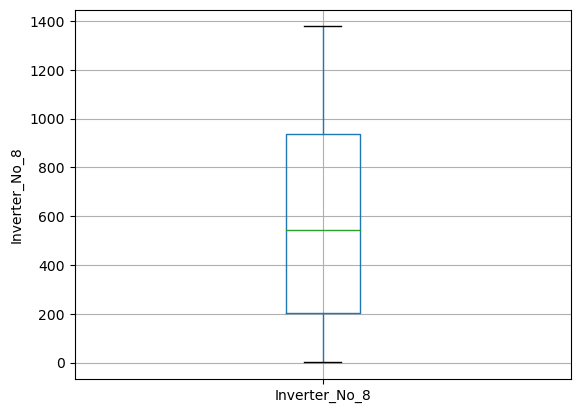

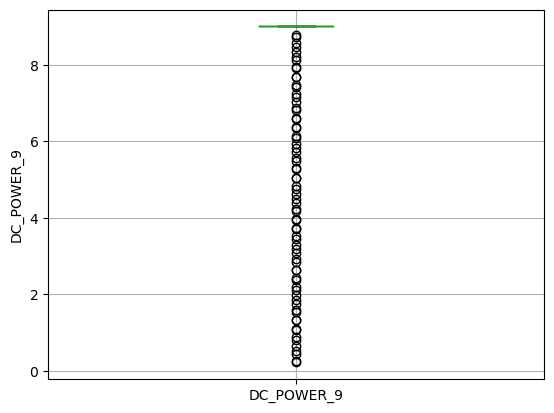

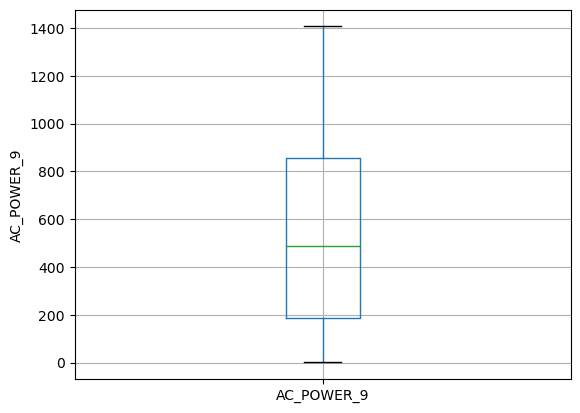

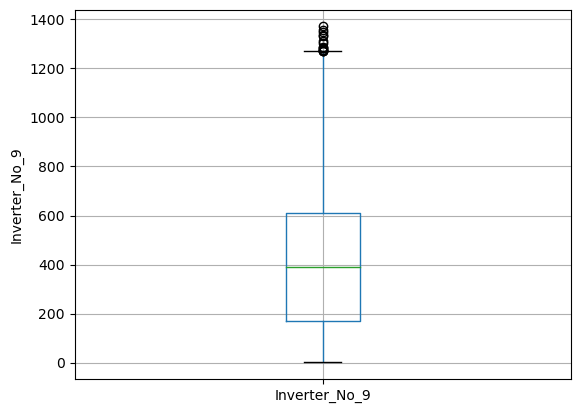

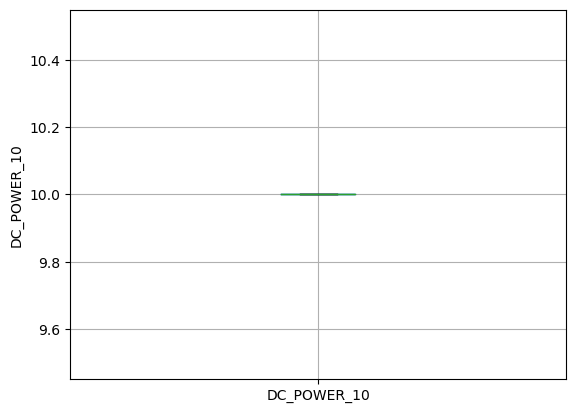

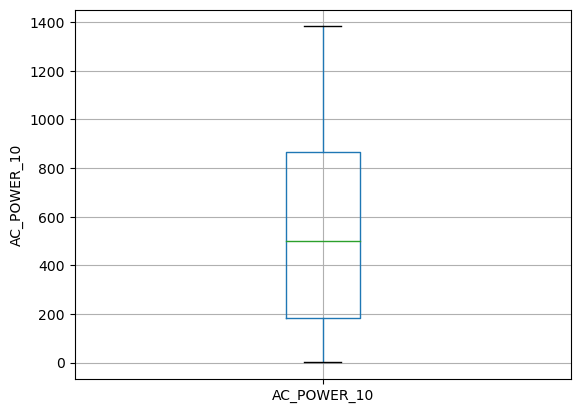

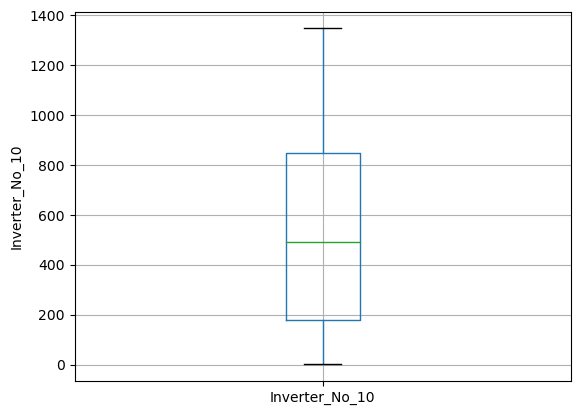

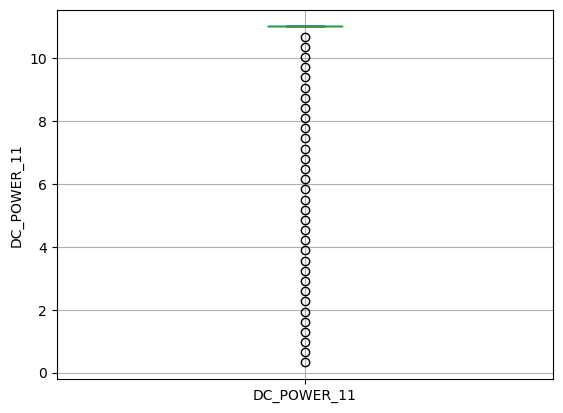

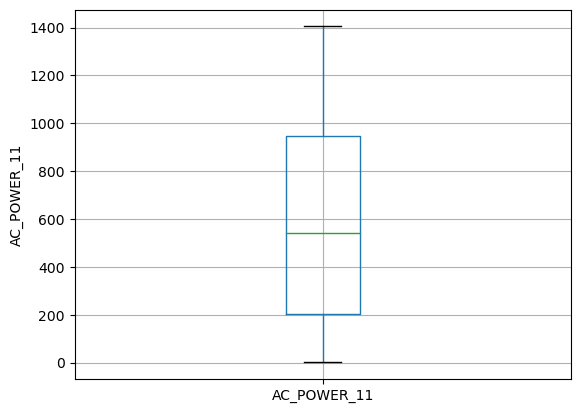

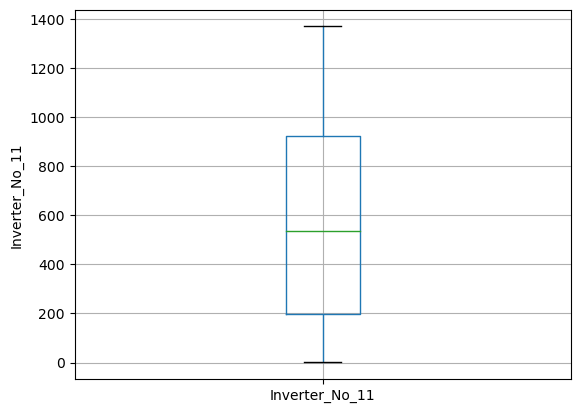

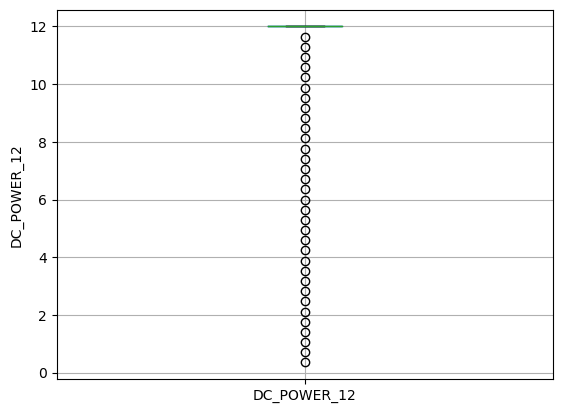

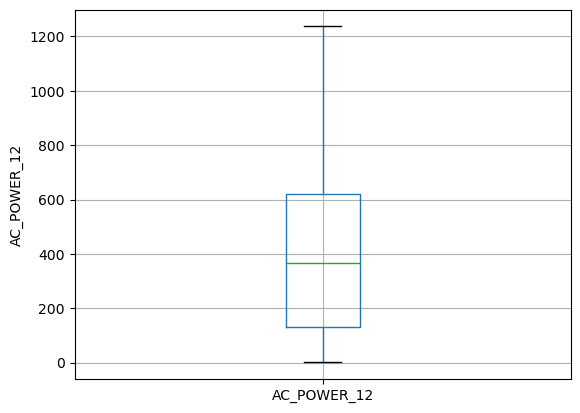

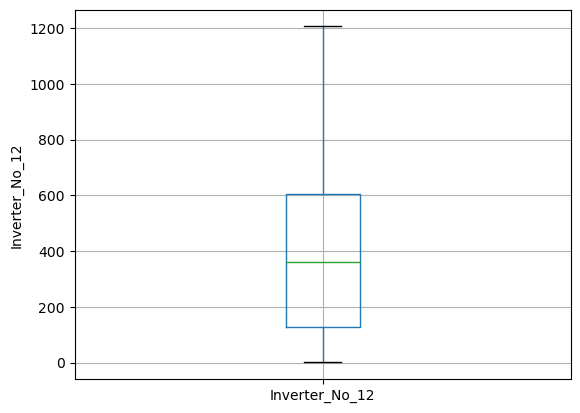

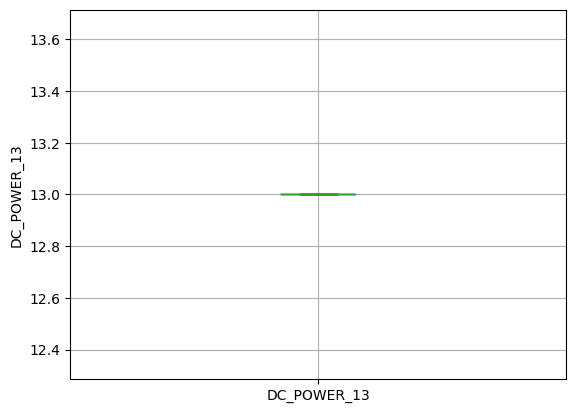

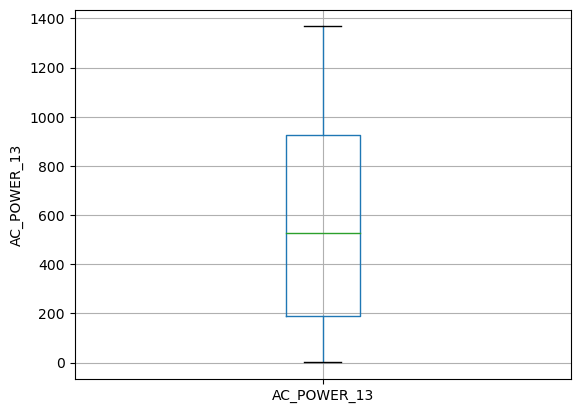

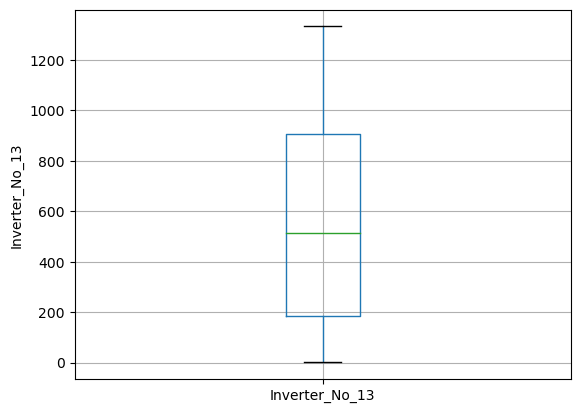

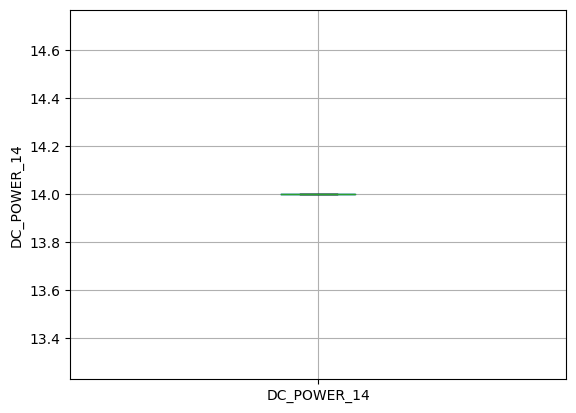

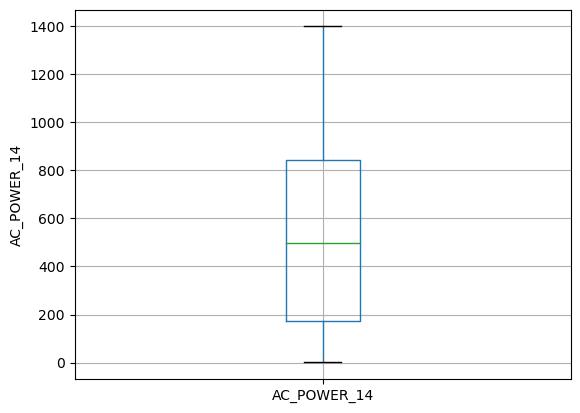

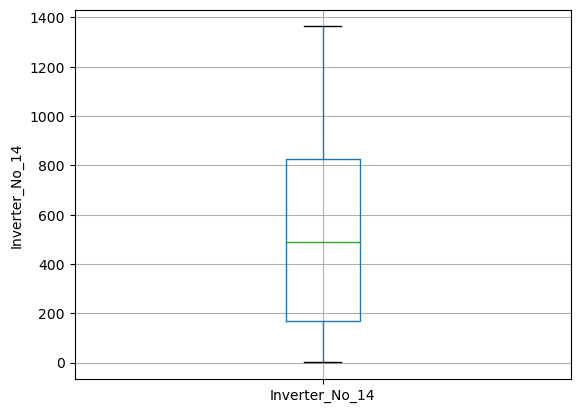

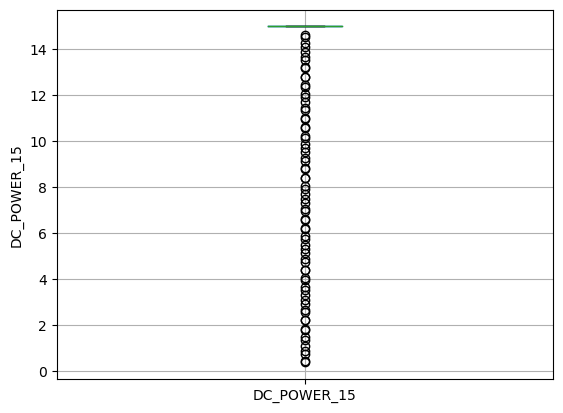

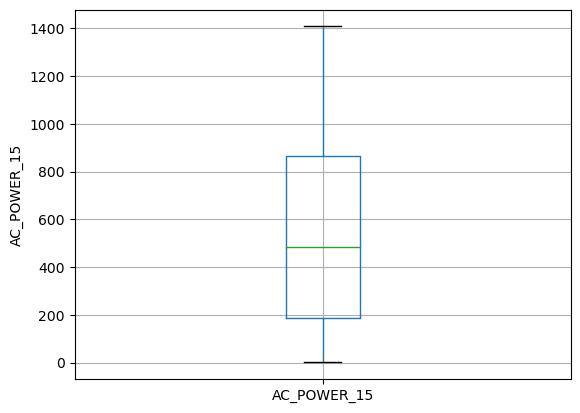

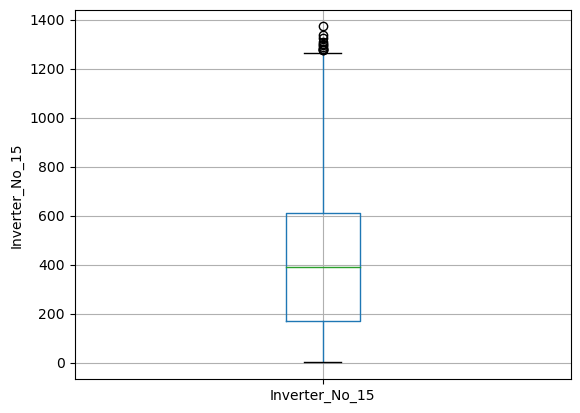

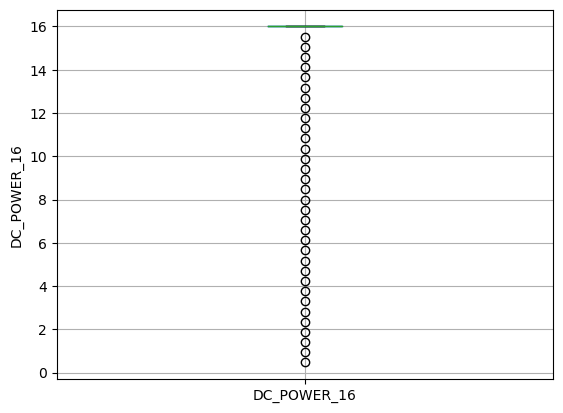

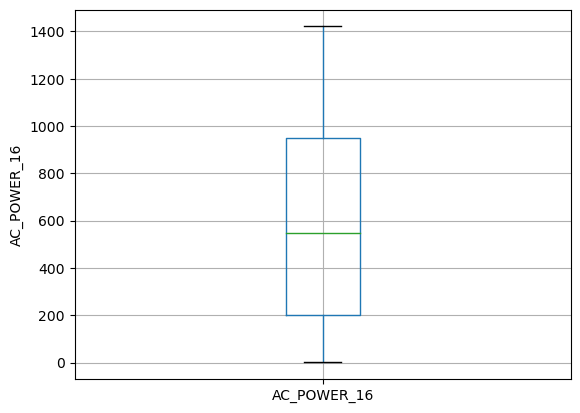

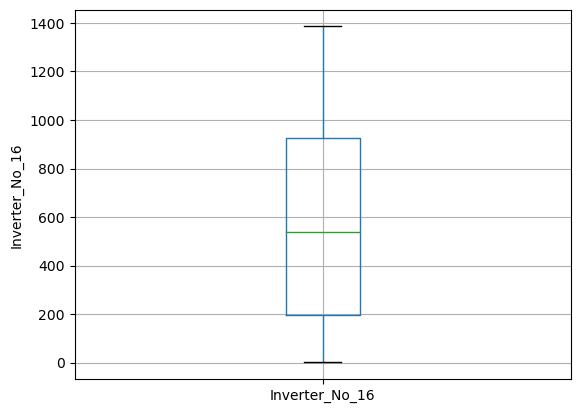

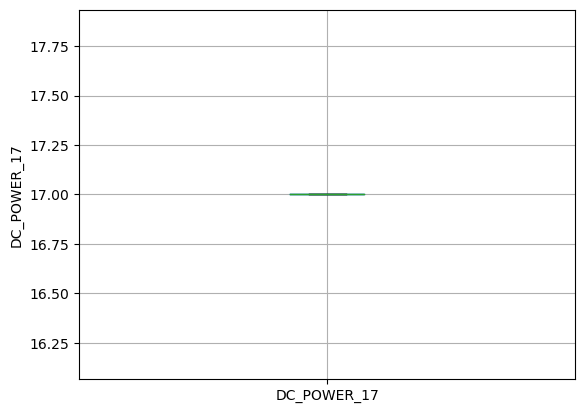

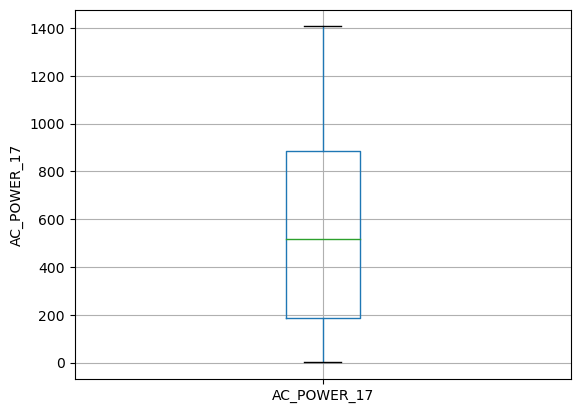

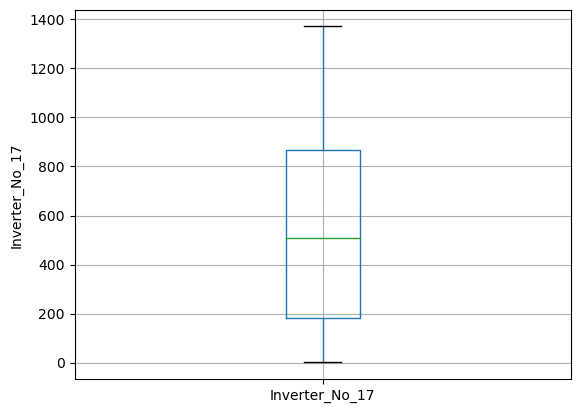

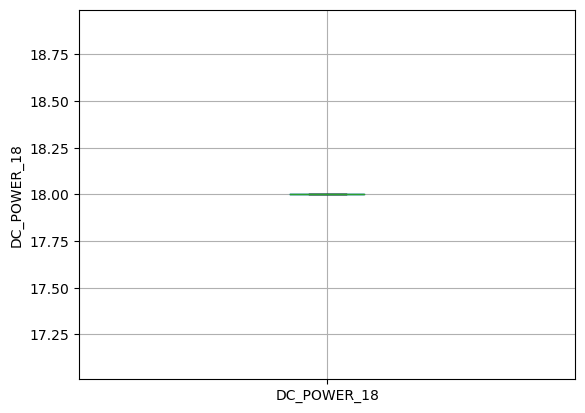

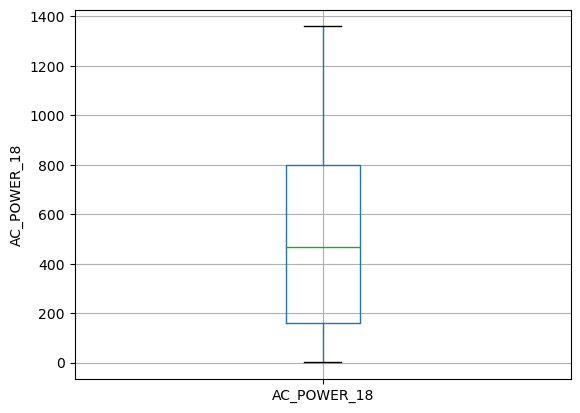

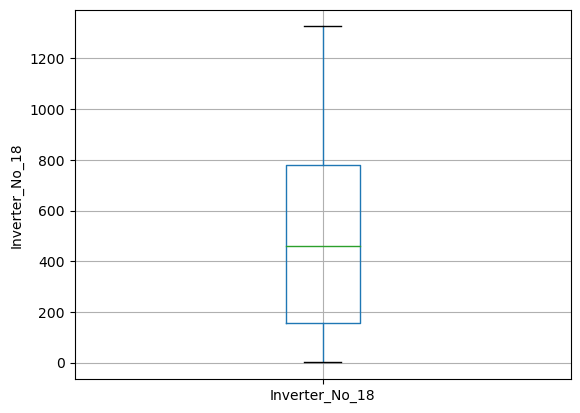

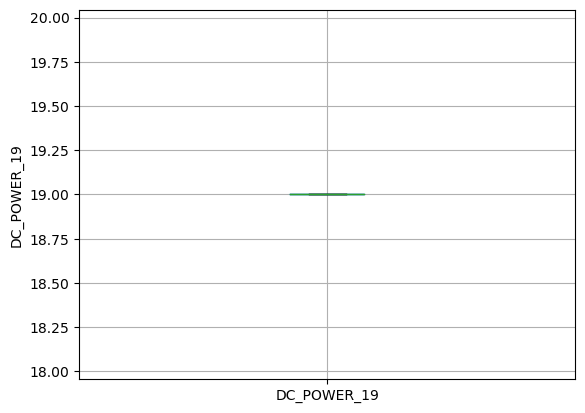

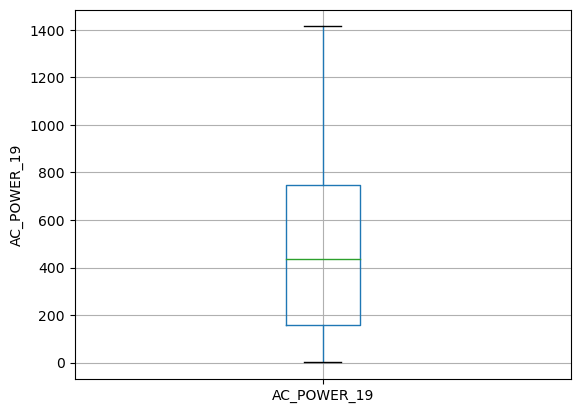

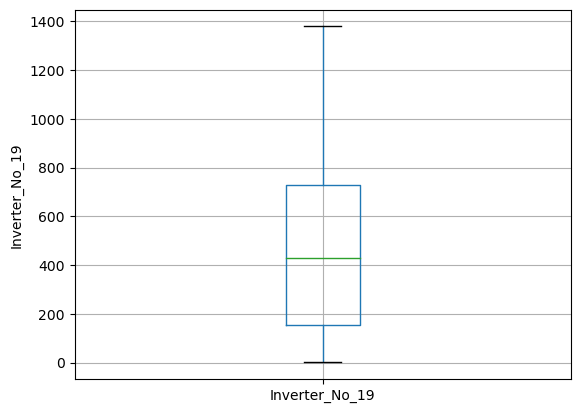

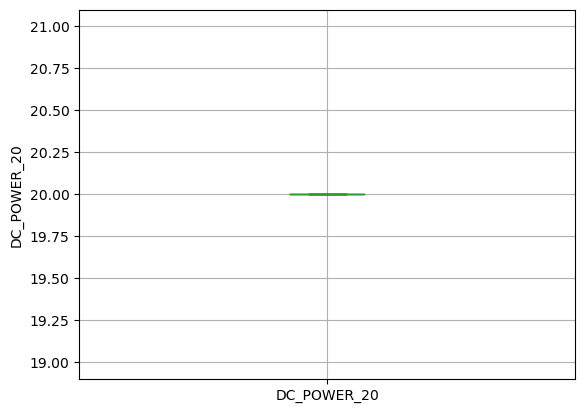

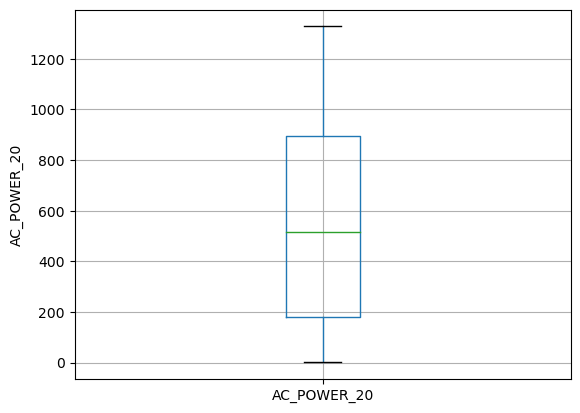

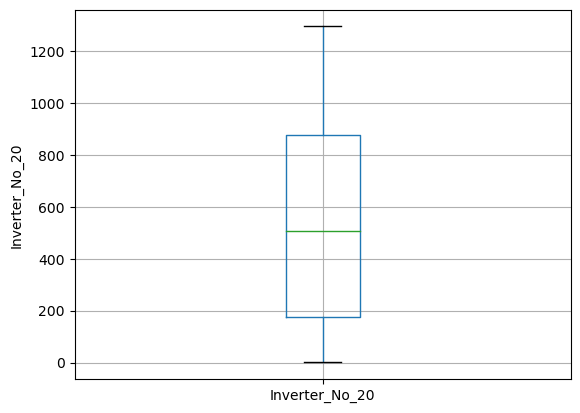

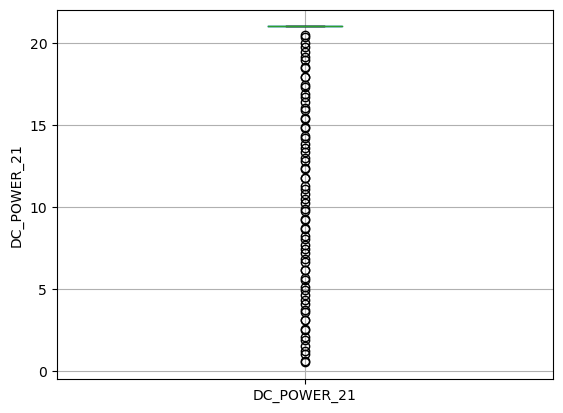

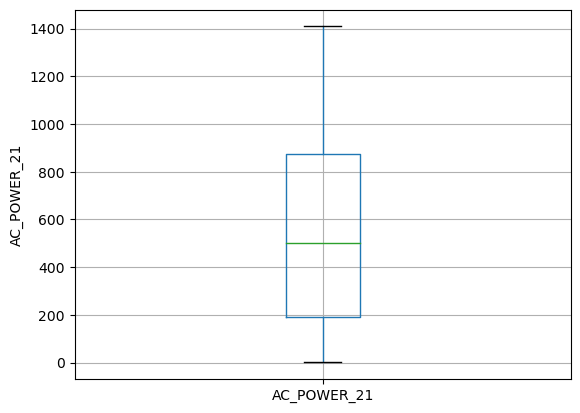

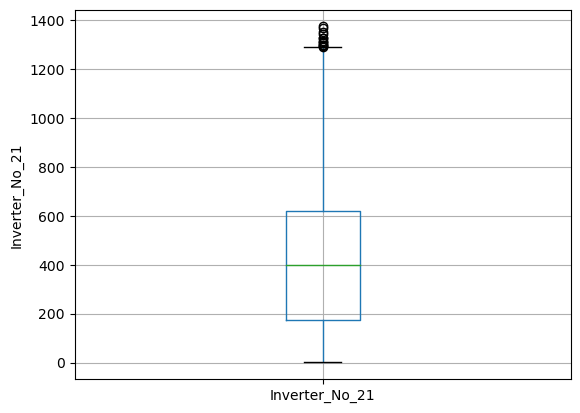

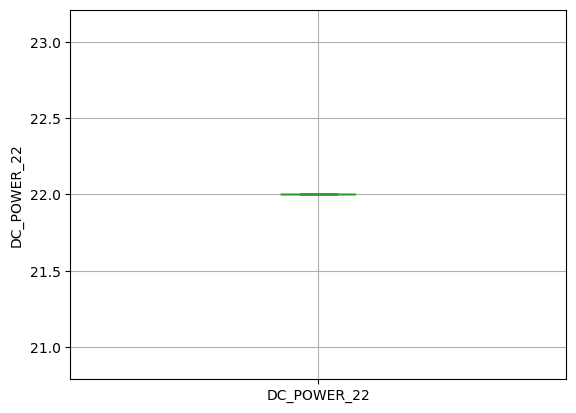

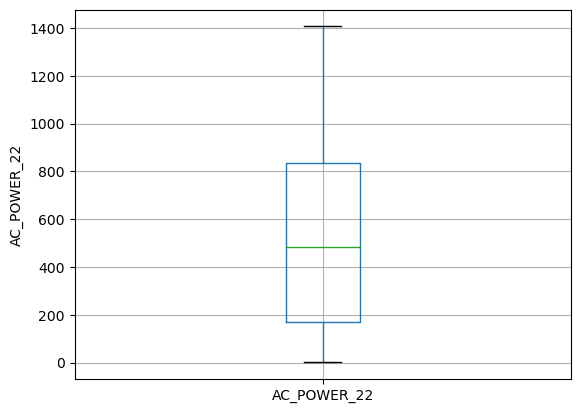

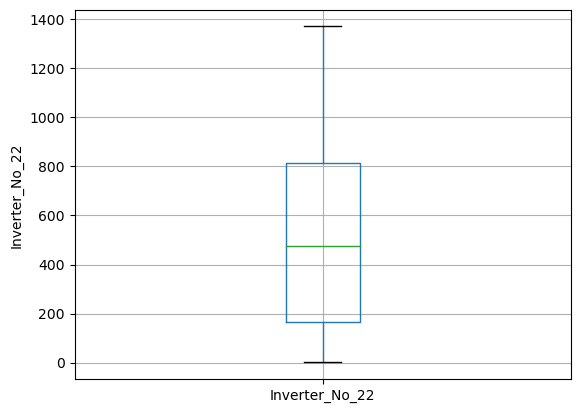

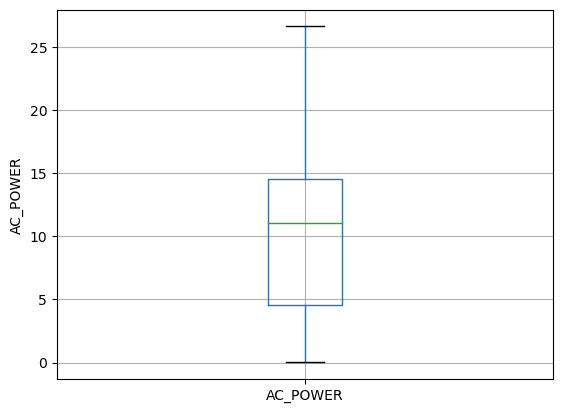

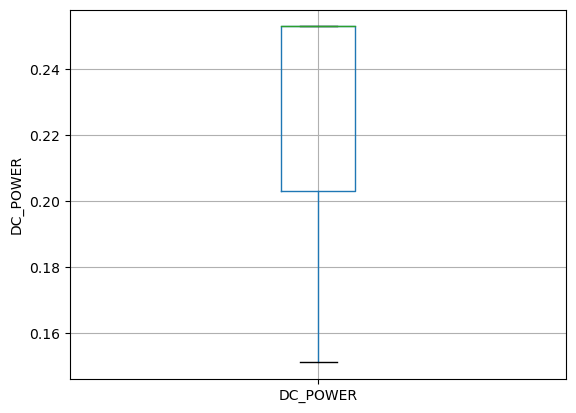

In [13]:

for feature in df_train.columns[3:]:
    # ignoring zero values for plotting
    df_train[df_train[feature]!=0].boxplot(column=feature)
    plt.ylabel(feature)
    plt.show()

C:\Users\quean\AppData\Local\Temp\ipykernel_1056\1926224646.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  display(df_train.iloc[:,1:].corr())


,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER_1,AC_POWER_1,Inverter_No_1,DC_POWER_2,AC_POWER_2,Inverter_No_2,DC_POWER_3,...,AC_POWER_20,Inverter_No_20,DC_POWER_21,AC_POWER_21,Inverter_No_21,DC_POWER_22,AC_POWER_22,Inverter_No_22,AC_POWER,DC_POWER
AMBIENT_TEMPERATURE,1.000000,0.842631,0.660469,0.108704,0.588689,0.577037,NaN,0.482133,0.482228,NaN,...,0.552329,0.552438,-0.224663,0.424587,0.536219,NaN,0.534155,0.534207,0.652054,-0.180352
MODULE_TEMPERATURE,0.842631,1.000000,0.947146,0.072692,0.827335,0.819616,NaN,0.671758,0.671674,NaN,...,0.739794,0.739737,-0.127817,0.633127,0.703032,NaN,0.713459,0.713336,0.885174,-0.099883
IRRADIATION,0.660469,0.947146,1.000000,0.034885,0.853650,0.850426,NaN,0.716132,0.715961,NaN,...,0.795831,0.795679,-0.067729,0.692068,0.736888,NaN,0.736880,0.736718,0.923922,-0.053839
DC_POWER_1,0.108704,0.072692,0.034885,1.000000,0.050300,-0.049536,NaN,0.046002,0.045998,NaN,...,0.015723,0.015784,0.177898,0.028878,-0.050252,NaN,0.064239,0.064252,0.050693,0.415595
AC_POWER_1,0.588689,0.827335,0.853650,0.050300,1.000000,0.993699,NaN,0.654763,0.654917,NaN,...,0.697016,0.697240,-0.065107,0.603409,0.632809,NaN,0.660772,0.660955,0.867843,-0.047544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DC_POWER_22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AC_POWER_22,0.534155,0.713459,0.736880,0.064239,0.660772,0.653570,NaN,0.757026,0.757250,NaN,...,0.683544,0.683995,-0.042852,0.538785,0.573738,NaN,1.000000,0.999993,0.802948,-0.023474
Inverter_No_22,0.534207,0.713336,0.736718,0.064252,0.660955,0.653758,NaN,0.757285,0.757514,NaN,...,0.683849,0.684305,-0.042613,0.539004,0.573833,NaN,0.999993,1.000000,0.803318,-0.023249
AC_POWER,0.652054,0.885174,0.923922,0.050693,0.867843,0.862990,NaN,0.789081,0.789427,NaN,...,0.846140,0.846525,0.018735,0.769131,0.782234,NaN,0.802948,0.803318,1.000000,0.030049


<Axes: >

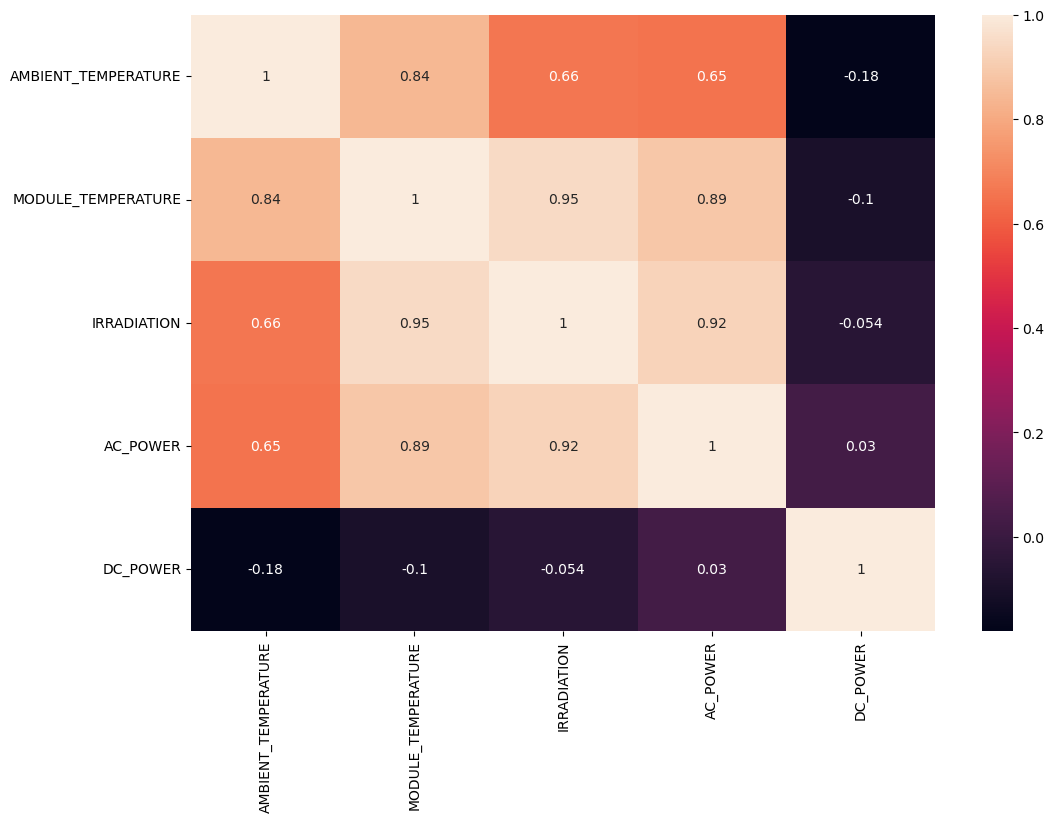

In [14]:

display(df_train.iloc[:,1:].corr())
plt.figure(figsize = (12,8))
sns.heatmap(df_train[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION',
       'AC_POWER', 'DC_POWER']].corr(),annot=True)

In [15]:
df_train.drop('DC_POWER',axis=1,inplace=True)
percentile_dict = {}
for i in df_train.columns[3:]:
    a_list = []
    for j in [1,10,25,50,75,90,99,100]:
        a_list.append(round(np.percentile(df_train[i],j),2))
    percentile_dict[i] = a_list    
pd.DataFrame(pd.concat([pd.DataFrame({'Percentiles':[1,10,25,50,75,90,99,100]}),pd.DataFrame(percentile_dict)],axis=1))        

C:\Users\quean\AppData\Local\Temp\ipykernel_1056\2980191810.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop('DC_POWER',axis=1,inplace=True)


,Percentiles,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER_1,AC_POWER_1,Inverter_No_1,DC_POWER_2,AC_POWER_2,Inverter_No_2,...,DC_POWER_20,AC_POWER_20,Inverter_No_20,DC_POWER_21,AC_POWER_21,Inverter_No_21,DC_POWER_22,AC_POWER_22,Inverter_No_22,AC_POWER
0,1,22.55,21.10,0.00,0.0,0.00,0.00,2.0,0.00,0.00,...,20.0,0.00,0.00,0.0,0.00,0.00,22.0,0.00,0.00,0.00
1,10,23.66,22.40,0.00,1.0,0.00,0.00,2.0,0.00,0.00,...,20.0,0.00,0.00,0.0,0.00,0.00,22.0,0.00,0.00,0.00
2,25,24.73,23.76,0.00,1.0,0.00,0.00,2.0,0.00,0.00,...,20.0,0.00,0.00,0.0,0.00,0.00,22.0,0.00,0.00,0.00
3,50,27.24,27.79,0.02,1.0,0.00,1.21,2.0,0.00,0.00,...,20.0,0.00,0.00,21.0,0.00,170.36,22.0,0.00,0.00,0.47
4,75,31.55,41.75,0.46,1.0,535.66,538.39,2.0,402.93,395.81,...,20.0,482.34,473.00,21.0,312.62,507.60,22.0,426.71,418.87,11.45
5,90,34.61,52.28,0.80,1.0,1024.51,1003.53,2.0,871.89,853.11,...,20.0,961.87,939.29,21.0,844.76,845.51,22.0,883.88,864.01,15.64
6,99,37.40,60.32,0.96,1.0,1313.71,1280.86,2.0,1265.76,1234.17,...,20.0,1289.11,1256.91,21.0,1280.58,1248.68,22.0,1254.15,1223.16,19.99
7,100,39.18,66.64,1.10,1.0,1419.84,1384.35,2.0,1382.21,1347.66,...,20.0,1327.49,1294.30,21.0,1408.86,1373.65,22.0,1406.17,1371.01,26.63


In [16]:
outlier_imputer_dict = {}

for var in df_train.columns[3:]:
    percentile_dict = {}
    
    NinetyNine_percentile = np.percentile(df_train[var],99)  
       
    First_percentile = np.percentile(df_train[var],1)

    percentile_dict['99th'] =  NinetyNine_percentile
    percentile_dict['1st'] =  First_percentile  
    # Saving as dictionary for each column
    outlier_imputer_dict[var] = percentile_dict
      
#Saving the final dictionary         
np.save('outlier_imputer_dict',outlier_imputer_dict)    
def outlier_imputer(df):
    #Loading Outlier Imputer dictionary
    outlier_dict = np.load('outlier_imputer_dict.npy',allow_pickle='TRUE').item()
    
    for var in df.columns[3:]:
        
        df.loc[df[df[var] > outlier_dict[var]['99th']].index,var] = outlier_dict[var]['99th']  
       
        df.loc[df[df[var] < outlier_dict[var]['1st']].index,var] = outlier_dict[var]['1st']
    
    return df

print(outlier_imputer_dict)

#Applying imputation on Train & Test 
df_train = outlier_imputer(df_train)
df_test = outlier_imputer(df_test)

{'AMBIENT_TEMPERATURE': {'99th': 37.39861080172414, '1st': 22.546186481034482}, 'MODULE_TEMPERATURE': {'99th': 60.32299286206897, '1st': 21.099540196666666}, 'IRRADIATION': {'99th': 0.9607427385333338, '1st': 0.0}, 'DC_POWER_1': {'99th': 1.0, '1st': 0.0}, 'AC_POWER_1': {'99th': 1313.7053333333336, '1st': 0.0}, 'Inverter_No_1': {'99th': 1280.8573333333336, '1st': 0.0}, 'DC_POWER_2': {'99th': 2.0, '1st': 2.0}, 'AC_POWER_2': {'99th': 1265.7593333333336, '1st': 0.0}, 'Inverter_No_2': {'99th': 1234.1740000000002, '1st': 0.0}, 'DC_POWER_3': {'99th': 3.0, '1st': 3.0}, 'AC_POWER_3': {'99th': 1257.8207142857143, '1st': 0.0}, 'Inverter_No_3': {'99th': 1226.3635714285713, '1st': 0.0}, 'DC_POWER_4': {'99th': 4.0, '1st': 0.0}, 'AC_POWER_4': {'99th': 1152.2673333333337, '1st': 0.0}, 'Inverter_No_4': {'99th': 1124.6880000000006, '1st': 0.0}, 'DC_POWER_5': {'99th': 5.0, '1st': 0.0}, 'AC_POWER_5': {'99th': 1292.5068095238098, '1st': 0.0}, 'Inverter_No_5': {'99th': 1260.6280000000002, '1st': 0.0}, 'DC_P

KeyError: 'DC_POWER'

In [17]:

#No. of bins
cut_blocks = [1,2,3,4,5,6,7,8]
#Bins range
cut_bins =[0, 12, 24, 36, 48, 60, 72, 84, 96]
#Assigning each row to a bin based on BLOCKS
df_train['BIN'] = pd.cut(df_train['BLOCK'], bins=cut_bins, labels = cut_blocks)
display(df_train)

C:\Users\quean\AppData\Local\Temp\ipykernel_1056\320304650.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['BIN'] = pd.cut(df_train['BLOCK'], bins=cut_bins, labels = cut_blocks)


,BLOCK,DATE,TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER_1,AC_POWER_1,Inverter_No_1,DC_POWER_2,...,AC_POWER_20,Inverter_No_20,DC_POWER_21,AC_POWER_21,Inverter_No_21,DC_POWER_22,AC_POWER_22,Inverter_No_22,AC_POWER,BIN
0,1,2020-05-15,00:00,27.004764,25.060789,0.0,1.0,0.0,0.0,2.0,...,0.0,0.0,21.0,0.0,0.0,22.0,0.0,0.0,0.0,1
1,2,2020-05-15,00:15,26.880811,24.421869,0.0,1.0,0.0,0.0,2.0,...,0.0,0.0,21.0,0.0,0.0,22.0,0.0,0.0,0.0,1
2,3,2020-05-15,00:30,26.682055,24.427290,0.0,1.0,0.0,0.0,2.0,...,0.0,0.0,21.0,0.0,0.0,22.0,0.0,0.0,0.0,1
3,4,2020-05-15,00:45,26.500589,24.420678,0.0,1.0,0.0,0.0,2.0,...,0.0,0.0,21.0,0.0,0.0,22.0,0.0,0.0,0.0,1
4,5,2020-05-15,01:00,26.596148,25.088210,0.0,1.0,0.0,0.0,2.0,...,0.0,0.0,21.0,0.0,0.0,22.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2966,92,2020-06-14,22:45,24.185657,22.922953,0.0,1.0,0.0,0.0,2.0,...,0.0,0.0,21.0,0.0,0.0,22.0,0.0,0.0,0.0,8
2967,93,2020-06-14,23:00,24.412542,23.356136,0.0,1.0,0.0,0.0,2.0,...,0.0,0.0,21.0,0.0,0.0,22.0,0.0,0.0,0.0,8
2968,94,2020-06-14,23:15,24.652915,23.913763,0.0,1.0,0.0,0.0,2.0,...,0.0,0.0,21.0,0.0,0.0,22.0,0.0,0.0,0.0,8
2969,95,2020-06-14,23:30,24.702391,24.185130,0.0,1.0,0.0,0.0,2.0,...,0.0,0.0,21.0,0.0,0.0,22.0,0.0,0.0,0.0,8


In [18]:
# ANN Model ---------------------------------------------------------------------
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense

def ANN_model():
    # 3 layered Neural network with 500 epochs and 4 batch size
    reg = Sequential()
    reg.add(Dense(16, input_dim = 3, activation = 'relu'))
    reg.add(Dense(8,kernel_initializer='normal', activation = 'relu'))
    reg.add(Dense(1))
    reg.compile(loss='mean_squared_error', optimizer='adam')
    return reg

ann_regressor = KerasRegressor(build_fn=ANN_model, nb_epoch=500, batch_size=4, verbose=False)

#-----------------------------------X---------------------------------------------------------
#Importing models & Scaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression  
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

## Pipeline for different Regression models 
pipeline_lr = Pipeline([('lin_regression',LinearRegression())])
pipeline_dt = Pipeline([('dt_regression',DecisionTreeRegressor(random_state=0))])
pipeline_rf = Pipeline([('rf_regression',RandomForestRegressor(random_state=0))])
pipeline_ridge = Pipeline([('ridge_regression',Ridge(random_state=0))])
pipeline_lasso = Pipeline([('lasso_regression',Lasso(random_state=0))])
pipeline_xgboost = Pipeline([('xgboost_regression',XGBRegressor())])
pipeline_ann = Pipeline([('ann_regressor',ann_regressor)])

## Making a list of pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_ridge, pipeline_lasso, pipeline_xgboost, pipeline_ann]

best_rmse = 100.0
best_regressor = 0
best_pipeline = ""

## Dictionary of Pipelines and Regressor types for ease of reference
pipe_dict = {0:'Linear Regression',1: 'Decision Tree Regressor',2:'Random Forest Regressor',
             3:'Ridge Regressor',4:'Lasso Regressor',5:'XG Boost Regressor',6:'ANN Regressor'}

C:\Users\quean\AppData\Local\Temp\ipykernel_1056\174352651.py:15: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ann_regressor = KerasRegressor(build_fn=ANN_model, nb_epoch=500, batch_size=4, verbose=False)


ModuleNotFoundError: No module named 'xgboost'